In [ ]:
import yfinance as yf

df = yf.Ticker("2618.TW").history(period="10y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-11-22 00:00:00+08:00,11.424830,11.531273,11.353868,11.495791,7291196,0.0,0.0
2013-11-25 00:00:00+08:00,11.602235,11.992524,11.566755,11.921562,40324132,0.0,0.0
2013-11-26 00:00:00+08:00,11.992526,12.205411,11.957045,12.063487,47072666,0.0,0.0
2013-11-27 00:00:00+08:00,12.134449,12.134449,11.957044,12.028007,23154029,0.0,0.0
2013-11-28 00:00:00+08:00,12.134449,12.169929,11.992525,12.028007,15716497,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-16 00:00:00+08:00,30.450001,32.250000,30.450001,32.000000,283299472,0.0,0.0
2023-11-17 00:00:00+08:00,32.500000,32.700001,31.799999,32.150002,150751791,0.0,0.0
2023-11-20 00:00:00+08:00,31.100000,31.850000,30.650000,31.549999,122003567,0.0,0.0


In [ ]:
!nvidia-smi

Wed Nov 22 11:21:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-16 00:00:00+08:00,30.450001,32.250000,30.450001,32.000000,283299472,0.0,0.0
2023-11-17 00:00:00+08:00,32.500000,32.700001,31.799999,32.150002,150751791,0.0,0.0
2023-11-20 00:00:00+08:00,31.100000,31.850000,30.650000,31.549999,122003567,0.0,0.0
2023-11-21 00:00:00+08:00,31.700001,31.799999,31.250000,31.400000,75196240,0.0,0.0
2023-11-22 00:00:00+08:00,31.549999,32.150002,31.299999,31.500000,87383096,0.0,0.0


In [ ]:
df=df.filter(["Close"])
df=df.rename(columns={"Close":"GT"})
df

,GT
Date,
2013-11-22 00:00:00+08:00,11.495791
2013-11-25 00:00:00+08:00,11.921562
2013-11-26 00:00:00+08:00,12.063487
2013-11-27 00:00:00+08:00,12.028007
2013-11-28 00:00:00+08:00,12.028007
...,...
2023-11-16 00:00:00+08:00,32.000000
2023-11-17 00:00:00+08:00,32.150002
2023-11-20 00:00:00+08:00,31.549999


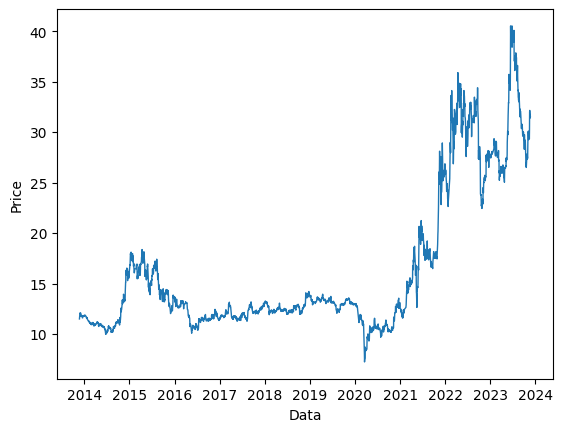

In [ ]:
import matplotlib.pyplot as plt

# plt.style.use("seaborn-darkgrid")
plt.xlabel("Data")
plt.ylabel("Price")
plt.plot(df["GT"],linewidth=1)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_prices=scaler.fit_transform(df.values)
scaled_prices

array([[0.12792366],
       [0.14071714],
       [0.14498167],
       ...,
       [0.73050846],
       [0.7260013 ],
       [0.7290061 ]])

In [ ]:
import numpy as np

MOVING_SIZE=60

all_x,all_y=[],[]

for i in range (len(scaled_prices)-MOVING_SIZE):
    x=scaled_prices[i:i+MOVING_SIZE]
    y=scaled_prices[i+MOVING_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x,all_y=np.array(all_x),np.array(all_y)
print(all_x.shape)
print(all_y.shape)

(2381, 60, 1)
(2381, 1)


In [ ]:
SPLIT=0.8

train_ds_size=round(all_x.shape[0]*SPLIT)
train_x,train_y=all_x[:train_ds_size],all_y[:train_ds_size]
test_x,test_y=all_x[train_ds_size:],all_y[train_ds_size:]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1905, 60, 1)
(1905, 1)
(476, 60, 1)
(476, 1)


In [ ]:
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(train_x.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)
model.fit(train_x,train_y,validation_split=0.2,callbacks=[callback],epochs=1000)

Epoch 1/1000
48/48 [==============================] - 11s 27ms/step - loss: 0.0026 - val_loss: 0.0030
Epoch 2/1000
48/48 [==============================] - 0s 9ms/step - loss: 2.8416e-04 - val_loss: 0.0016
Epoch 3/1000
48/48 [==============================] - 0s 10ms/step - loss: 2.3513e-04 - val_loss: 0.0015
Epoch 4/1000
48/48 [==============================] - 0s 10ms/step - loss: 2.3562e-04 - val_loss: 0.0015
Epoch 5/1000
48/48 [==============================] - 1s 11ms/step - loss: 1.9629e-04 - val_loss: 0.0013
Epoch 6/1000
48/48 [==============================] - 1s 13ms/step - loss: 1.8420e-04 - val_loss: 0.0013
Epoch 7/1000
48/48 [==============================] - 1s 13ms/step - loss: 1.7363e-04 - val_loss: 0.0012
Epoch 8/1000
48/48 [==============================] - 1s 13ms/step - loss: 1.6003e-04 - val_loss: 9.9157e-04
Epoch 9/1000
48/48 [==============================] - 1s 15ms/step - loss: 1.5934e-04 - val_loss: 9.7147e-04
Epoch 10/1000
48/48 [==============================

In [ ]:
preds=model.predict(test_x)
preds

15/15 [==============================] - 1s 4ms/step


array([[0.5475172 ],
       [0.6005619 ],
       [0.61527824],
       [0.6620319 ],
       [0.6209208 ],
       [0.56788665],
       [0.5324553 ],
       [0.5802509 ],
       [0.5564349 ],
       [0.5458491 ],
       [0.5782404 ],
       [0.55403167],
       [0.55233073],
       [0.5530866 ],
       [0.5600719 ],
       [0.5798212 ],
       [0.5754069 ],
       [0.5701853 ],
       [0.59626824],
       [0.5518548 ],
       [0.5747426 ],
       [0.57332623],
       [0.573186  ],
       [0.5625172 ],
       [0.5382902 ],
       [0.5400987 ],
       [0.511039  ],
       [0.50966674],
       [0.5228367 ],
       [0.53612137],
       [0.52262044],
       [0.50702614],
       [0.5168882 ],
       [0.4831776 ],
       [0.48869875],
       [0.4617196 ],
       [0.48107463],
       [0.56101155],
       [0.5801533 ],
       [0.6103891 ],
       [0.61864257],
       [0.6625912 ],
       [0.6136954 ],
       [0.70324355],
       [0.6976009 ],
       [0.81491816],
       [0.7868948 ],
       [0.689

In [ ]:
preds=scaler.inverse_transform(preds)
preds

array([[25.459993],
       [27.225338],
       [27.715101],
       [29.271078],
       [27.902887],
       [26.137896],
       [24.958729],
       [26.549381],
       [25.756779],
       [25.404478],
       [26.482471],
       [25.676798],
       [25.62019 ],
       [25.645344],
       [25.877817],
       [26.535082],
       [26.388172],
       [26.214396],
       [27.082443],
       [25.60435 ],
       [26.366064],
       [26.318926],
       [26.314259],
       [25.959198],
       [25.152916],
       [25.213104],
       [24.245989],
       [24.20032 ],
       [24.638618],
       [25.080736],
       [24.631422],
       [24.112438],
       [24.44065 ],
       [23.318752],
       [23.502499],
       [22.604624],
       [23.248764],
       [25.90909 ],
       [26.546133],
       [27.55239 ],
       [27.827068],
       [29.289692],
       [27.662424],
       [30.642614],
       [30.454824],
       [34.35918 ],
       [33.426556],
       [30.192682],
       [31.97105 ],
       [34.904167],


<function matplotlib.pyplot.show(close=None, block=None)>

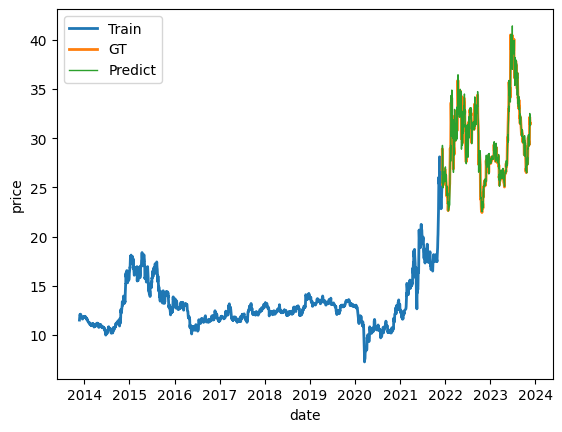

In [ ]:
# MOVING_SIZE=60

train_df=df[:train_ds_size + MOVING_SIZE]
test_df=df[train_ds_size + MOVING_SIZE:]
test_df=test_df.assign(Predict=preds)

plt.xlabel("date")
plt.ylabel("price")
plt.plot(train_df["GT"],linewidth=2)
plt.plot(test_df["GT"],linewidth=2)
plt.plot(test_df["Predict"],linewidth=1)
plt.legend(["Train","GT","Predict"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

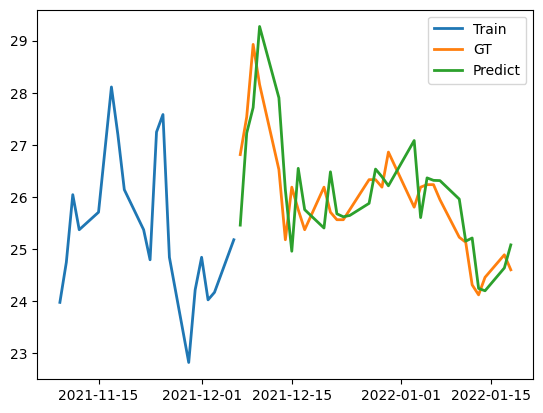

In [ ]:
plt.plot(train_df["GT"][-20:],linewidth=2)
plt.plot(test_df["GT"][:30],linewidth=2)
plt.plot(test_df["Predict"][:30],linewidth=2)
plt.legend(["Train","GT","Predict"])
plt.show

#predict疑似只是把真實股價平移

<function matplotlib.pyplot.show(close=None, block=None)>

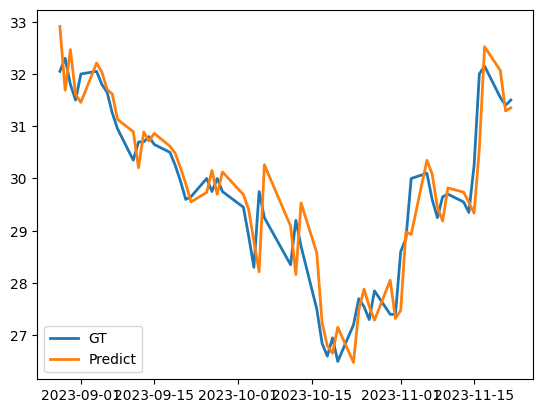

In [ ]:
plt.plot(test_df["GT"][-60:],linewidth=2)
plt.plot(test_df["Predict"][-60:],linewidth=2)
plt.legend(["GT","Predict"])
plt.show

In [ ]:
check_df=test_df.assign(Shifted=test_df["GT"].shift(1))
check_df.iat[0,-1]=train_df.iat[-1,-1]
check_df

,GT,Predict,Shifted
Date,,,
2021-12-07 00:00:00+08:00,26.813078,25.459993,25.179308
2021-12-08 00:00:00+08:00,27.533859,27.225338,26.813078
2021-12-09 00:00:00+08:00,28.927372,27.715101,27.533859
2021-12-10 00:00:00+08:00,28.158539,29.271078,28.927372
2021-12-13 00:00:00+08:00,26.524767,27.902887,28.158539
...,...,...,...
2023-11-16 00:00:00+08:00,32.000000,30.568174,30.250000
2023-11-17 00:00:00+08:00,32.150002,32.520847,32.000000
2023-11-20 00:00:00+08:00,31.549999,32.066055,32.150002


In [ ]:
from sklearn.metrics import mean_squared_error

pred_rmse=mean_squared_error(check_df["GT"],check_df["Predict"],squared=False)
pred_cvrmse=pred_rmse/ check_df["GT"].mean()*100
pred_cvrmse


2.872357493849502

In [ ]:
shift_rmse=mean_squared_error(check_df["GT"],check_df["Shifted"],squared=False)
shift_cvrmse=shift_rmse/ check_df["GT"].mean()*100
shift_cvrmse

2.7234062051051953